<H1 style="color:cyan; font-weight:bold;">Sign Reader.</H1>

In this project, a ConvNet is employed in this project to detect six signs, which are represented with hands to show the digit.

## Import Packages

In [1]:
import numpy as np
from util import *
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.models import Sequential

2024-03-25 14:24:56.497376: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-25 14:24:56.527489: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-25 14:24:57.007859: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load the Train and Test Dataset

The dataset will be loaded from the util file

In [2]:
X_train_original, Y_train_original, X_test_original, Y_test_original, classes = load_signs_dataset()

print("X_train_original >> ", X_train_original.shape)
print("Y_train_original >> ", Y_train_original.shape)
print("X_test_original >> ", X_test_original.shape)
print("Y_test_original >> ", Y_test_original.shape)
print("classes >> ", classes.shape)

X_train_original >>  (1080, 64, 64, 3)
Y_train_original >>  (1, 1080)
X_test_original >>  (120, 64, 64, 3)
Y_test_original >>  (1, 120)
classes >>  (6,)


#### Plot Images
plot random images with their response

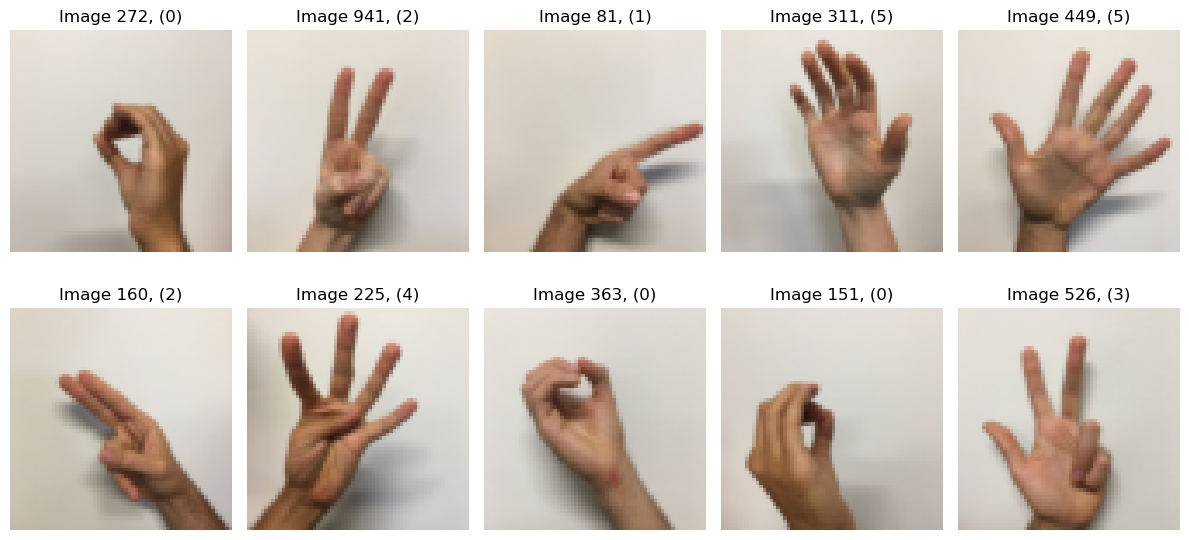

[[238 238 238 ... 222 221 221]
 [237 238 238 ... 222 222 223]
 [236 237 238 ... 222 222 221]
 ...
 [218 217 217 ... 214 214 214]
 [217 217 216 ... 214 215 215]
 [216 216 215 ... 214 215 215]]


In [3]:
# Randomly select 10 indices
num_samples = X_train_original.shape[0]
indices = np.random.choice(num_samples, size=10, replace=False)

# Plot the selected images
plt.figure(figsize=(12, 6))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train_original[idx])
    plt.title(f"Image {idx}, ({Y_train_original[:,idx][0]})")
    plt.axis('off')

plt.tight_layout()
plt.show()

print(X_train_original[1, :, :, 0])

#### Normalize Data
Divide all data by the maximum 255

In [32]:
X_train = X_train_original/255.
X_test = X_test_original/255.
Y_train = convert_to_one_hot(Y_train_original, 6).T
Y_test = convert_to_one_hot(Y_test_original, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

print(X_train[1,:,:,0])

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)
[[0.93333333 0.93333333 0.93333333 ... 0.87058824 0.86666667 0.86666667]
 [0.92941176 0.93333333 0.93333333 ... 0.87058824 0.87058824 0.8745098 ]
 [0.9254902  0.92941176 0.93333333 ... 0.87058824 0.87058824 0.86666667]
 ...
 [0.85490196 0.85098039 0.85098039 ... 0.83921569 0.83921569 0.83921569]
 [0.85098039 0.85098039 0.84705882 ... 0.83921569 0.84313725 0.84313725]
 [0.84705882 0.84705882 0.84313725 ... 0.83921569 0.84313725 0.84313725]]


#### Model

Setup the sequential model for the convnet.

Input -> ZEROPAD2D -> CONV2D -> BatchNormalization -> RELU Activation Function -> MaxPool2D -> Flatten -> Fully Connected Layers -> Output

In [33]:
def signReader(input_shape):

    # Setup input layer
    input_image = tf.keras.Input(shape=input_shape)

    # 2D convolution with 8 filters of size 4 by 4 and a stride of 1 using same padding.
    Z1 = tfl.Conv2D(8, 4, 1, padding='same')(input_image)

    #use ReLU activation  function
    A1 = tfl.ReLU()(Z1)

    #Use a MaxPooling layer of 8 by 8 and a stride of 8. Use same padding for the pooling layer.
    P1 = tfl.MaxPooling2D(8, 8, padding='same')(A1)

    # 2D convolution with 16 filters of size 2 by 2 and a stride of 1 using same padding.
    Z2 = tfl.Conv2D(16, 2, 1, padding='same')(P1)

    #use ReLU activation  function
    A2 = tfl.ReLU()(Z2)

    #Use a MaxPooling layer of 4 by 4 and a stride of 4. Use same padding for the pooling layer.
    P2 = tfl.MaxPooling2D(4, 4, padding='same')(A2)

    F = tfl.Flatten()(P2)

    outputs = tfl.Dense(6, activation='softmax')(F)

    model = tf.keras.Model(inputs=input_image, outputs=outputs)

    return model

In [17]:
sign_reader_model = signReader((64, 64, 3))

sign_reader_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 8)      │           392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_6 (ReLU)                  │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 16)       │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_7 (ReLU)                  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 2, 2, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,310 (5.12 KB)

 Trainable params: 1,310 (5.12 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
sign_reader_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### Batch Training Dataset

In [35]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)

type(train_dataset)

for batch in train_dataset:
    inputs, targets = batch
    print("Batch Inputs Shape:", inputs.shape)
    print("Batch Targets Shape:", targets.shape)

Batch Inputs Shape: (64, 64, 64, 3)
Batch Targets Shape: (64, 6)
Batch Inputs Shape: (64, 64, 64, 3)
Batch Targets Shape: (64, 6)
Batch Inputs Shape: (64, 64, 64, 3)
Batch Targets Shape: (64, 6)
Batch Inputs Shape: (64, 64, 64, 3)
Batch Targets Shape: (64, 6)
Batch Inputs Shape: (64, 64, 64, 3)
Batch Targets Shape: (64, 6)
Batch Inputs Shape: (64, 64, 64, 3)
Batch Targets Shape: (64, 6)
Batch Inputs Shape: (64, 64, 64, 3)
Batch Targets Shape: (64, 6)
Batch Inputs Shape: (64, 64, 64, 3)
Batch Targets Shape: (64, 6)
Batch Inputs Shape: (64, 64, 64, 3)
Batch Targets Shape: (64, 6)
Batch Inputs Shape: (64, 64, 64, 3)
Batch Targets Shape: (64, 6)
Batch Inputs Shape: (64, 64, 64, 3)
Batch Targets Shape: (64, 6)
Batch Inputs Shape: (64, 64, 64, 3)
Batch Targets Shape: (64, 6)
Batch Inputs Shape: (64, 64, 64, 3)
Batch Targets Shape: (64, 6)
Batch Inputs Shape: (64, 64, 64, 3)
Batch Targets Shape: (64, 6)
Batch Inputs Shape: (64, 64, 64, 3)
Batch Targets Shape: (64, 6)
Batch Inputs Shape: (64, 

2024-03-25 15:10:02.056759: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
history = sign_reader_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1676 - loss: 1.8338 - val_accuracy: 0.2417 - val_loss: 1.7897
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2419 - loss: 1.7887 - val_accuracy: 0.3083 - val_loss: 1.7828
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3021 - loss: 1.7804 - val_accuracy: 0.2917 - val_loss: 1.7782
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2704 - loss: 1.7762 - val_accuracy: 0.3333 - val_loss: 1.7729
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3186 - loss: 1.7710 - val_accuracy: 0.3000 - val_loss: 1.7670
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3342 - loss: 1.7655 - val_accuracy: 0.3083 - val_loss: 1.7602
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3356 - loss: 1.7592 - val_accuracy: 0.3583 - val_loss: 1.7514
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3810 - loss: 1.7500 - val_accuracy: 0.3667 - 

/tmp/ipykernel_18480/4567317.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
/tmp/ipykernel_18480/4567317.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

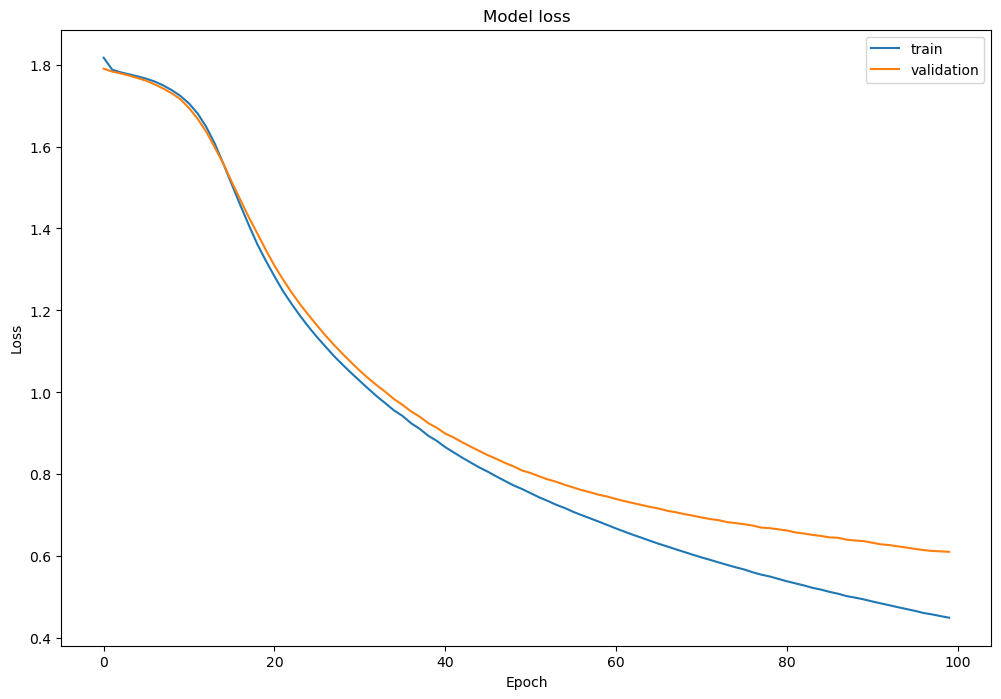

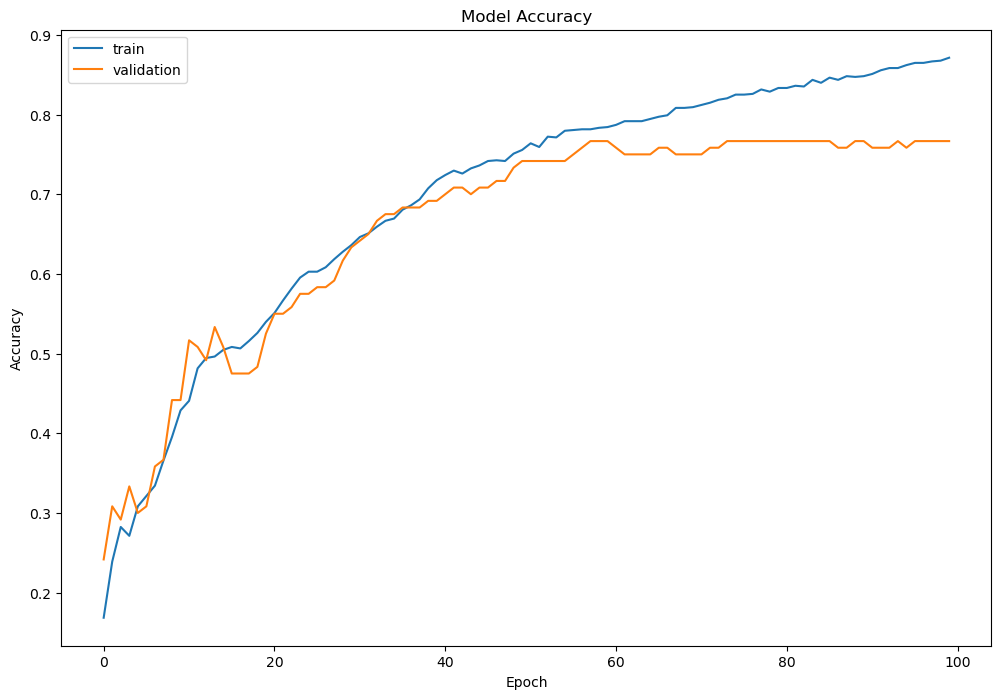

In [39]:
import pandas as pd

# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')